In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [2]:
df=pd.read_csv("Classification dataset.csv", encoding= 'unicode_escape')
df.head()

,first_commit_message,title,first_comment,files_changed,file_extension,labels,lines_added,lines_removed,everything,all_excluding_first_commit,all_excluding_title,all_excluding_first_comment,all_excluding_labels,all_without_file_extensions,all_string_data,title_commit_comment,final_tag
0,Update nice-urls.markdown,Update nice-urls.markdown,added url rewrite settings for IIS,1,markdown,NaN,34,0,Update nice-urls.markdown Update nice-urls.mar...,Update nice-urls.markdown added url rewrite se...,Update nice-urls.markdown added url rewrite se...,Update nice-urls.markdown Update nice-urls.mar...,Update nice-urls.markdown Update nice-urls.mar...,Update nice-urls.markdown Update nice-urls.mar...,Update nice-urls.markdown Update nice-urls.mar...,Update nice-urls.markdown Update nice-urls.mar...,documentation
1,Add error logging to nagios wrapper,Add error logging to nagios wrapper,Logs a debug message showing the output of eac...,1,py,NaN,11,1,Add error logging to nagios wrapper Add error ...,Add error logging to nagios wrapper Logs a deb...,Add error logging to nagios wrapper Logs a deb...,Add error logging to nagios wrapper Add error ...,Add error logging to nagios wrapper Add error ...,Add error logging to nagios wrapper Add error ...,Add error logging to nagios wrapper Add error ...,Add error logging to nagios wrapper Add error ...,feature
2,Don't markdown project owner's name in tooltip,Don't markdown project owner's name in tooltip,This change passes current unit tests. I added...,3,php,NaN,10,5,Don't markdown project owner's name in tooltip...,Don't markdown project owner's name in tooltip...,Don't markdown project owner's name in tooltip...,Don't markdown project owner's name in tooltip...,Don't markdown project owner's name in tooltip...,Don't markdown project owner's name in tooltip...,Don't markdown project owner's name in tooltip...,Don't markdown project owner's name in tooltip...,feature
3,Added example configuration file,Added example configuration file,self-explaining config file,1,conf,NaN,111,0,Added example configuration file Added example...,Added example configuration file self-explaini...,Added example configuration file self-explaini...,Added example configuration file Added example...,Added example configuration file Added example...,Added example configuration file Added example...,Added example configuration file Added example...,Added example configuration file Added example...,documentation
4,fix clang device compile,fix clang device compile,The compiler will abort with an error if the p...,1,cmake,CUDA bug,2,0,fix clang device compile fix clang device comp...,fix clang device compile The compiler will ab...,fix clang device compile The compiler will abo...,fix clang device compile fix clang device comp...,fix clang device compile fix clang device comp...,fix clang device compile fix clang device comp...,fix clang device compile fix clang device comp...,fix clang device compile fix clang device comp...,bug


In [3]:
df.files_changed = df.files_changed.astype(str)
df.lines_added = df.lines_added.astype(str)
df.lines_removed = df.lines_removed.astype(str)

# strings without labels
df['strings_no_labels'] = df['first_comment']+ ' ' + df['first_commit_message'] + ' '+ df['title']

# only numerical values
df['numerical_cols'] = df['files_changed']+ ' ' +df['lines_added'] + ' ' +df['lines_removed']

df.fillna('', inplace=True)

df.lines_added = pd.to_numeric(df.lines_added)
df.files_changed = pd.to_numeric(df.files_changed)
df.lines_removed = pd.to_numeric(df.lines_removed)

In [4]:
df['category_id'] = df['final_tag'].factorize()[0]
category_id_df = df[['final_tag', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'final_tag']].values)

In [5]:
df

,first_commit_message,title,first_comment,files_changed,file_extension,labels,lines_added,lines_removed,everything,all_excluding_first_commit,all_excluding_title,all_excluding_first_comment,all_excluding_labels,all_without_file_extensions,all_string_data,title_commit_comment,final_tag,strings_no_labels,numerical_cols,category_id
0,Update nice-urls.markdown,Update nice-urls.markdown,added url rewrite settings for IIS,1,markdown,,34,0,Update nice-urls.markdown Update nice-urls.mar...,Update nice-urls.markdown added url rewrite se...,Update nice-urls.markdown added url rewrite se...,Update nice-urls.markdown Update nice-urls.mar...,Update nice-urls.markdown Update nice-urls.mar...,Update nice-urls.markdown Update nice-urls.mar...,Update nice-urls.markdown Update nice-urls.mar...,Update nice-urls.markdown Update nice-urls.mar...,documentation,added url rewrite settings for IIS Update nice...,1 34 0,0
1,Add error logging to nagios wrapper,Add error logging to nagios wrapper,Logs a debug message showing the output of eac...,1,py,,11,1,Add error logging to nagios wrapper Add error ...,Add error logging to nagios wrapper Logs a deb...,Add error logging to nagios wrapper Logs a deb...,Add error logging to nagios wrapper Add error ...,Add error logging to nagios wrapper Add error ...,Add error logging to nagios wrapper Add error ...,Add error logging to nagios wrapper Add error ...,Add error logging to nagios wrapper Add error ...,feature,Logs a debug message showing the output of eac...,1 11 1,1
2,Don't markdown project owner's name in tooltip,Don't markdown project owner's name in tooltip,This change passes current unit tests. I added...,3,php,,10,5,Don't markdown project owner's name in tooltip...,Don't markdown project owner's name in tooltip...,Don't markdown project owner's name in tooltip...,Don't markdown project owner's name in tooltip...,Don't markdown project owner's name in tooltip...,Don't markdown project owner's name in tooltip...,Don't markdown project owner's name in tooltip...,Don't markdown project owner's name in tooltip...,feature,This change passes current unit tests. I added...,3 10 5,1
3,Added example configuration file,Added example configuration file,self-explaining config file,1,conf,,111,0,Added example configuration file Added example...,Added example configuration file self-explaini...,Added example configuration file self-explaini...,Added example configuration file Added example...,Added example configuration file Added example...,Added example configuration file Added example...,Added example configuration file Added example...,Added example configuration file Added example...,documentation,self-explaining config file Added example conf...,1 111 0,0
4,fix clang device compile,fix clang device compile,The compiler will abort with an error if the p...,1,cmake,CUDA bug,2,0,fix clang device compile fix clang device comp...,fix clang device compile The compiler will ab...,fix clang device compile The compiler will abo...,fix clang device compile fix clang device comp...,fix clang device compile fix clang device comp...,fix clang device compile fix clang device comp...,fix clang device compile fix clang device comp...,fix clang device compile fix clang device comp...,bug,The compiler will abort with an error if the p...,1 2 0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,Updated .gitignore to ignore wiki clone,Wiki automation,Closes #203,2,gitignore py,ux enhancement,39,0,Updated .gitignore to ignore wiki clone Wiki a...,Wiki automation Closes #203 2 gitignore py ux ...,Updated .gitignore to ignore wiki clone Closes...,Updated .gitignore to ignore wiki clone Wiki a...,Updated .gitignore to ignore wiki clone Wiki a...,Updated .gitignore to ignore wiki clone Wiki a...,Updated .gitignore to ignore wiki clone Wiki a...,Updated .gitignore to ignore wiki clone Wiki a...,feature,Closes #203 Updated .gitignore to ignore wiki ...,2 39 0,1
322,v2.5.2,v2.5.2,,6,lock md rb,,14,6

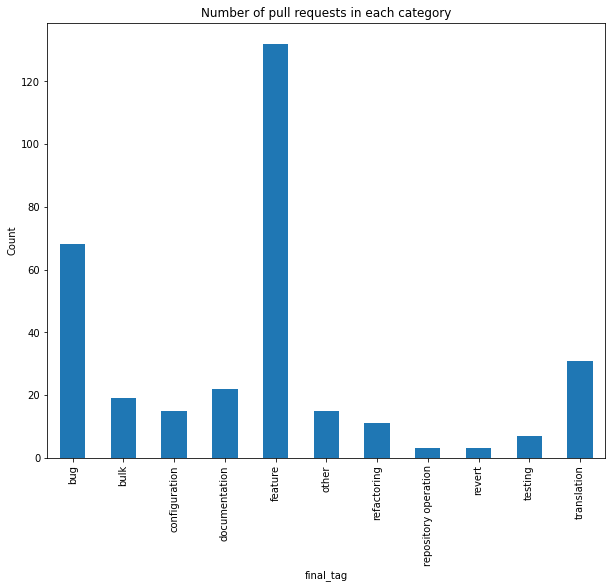

In [6]:
fig = plt.figure(figsize=(10,8))
df.groupby('final_tag').final_tag.count().plot.bar(ylim=0)
plt.title('Number of pull requests in each category')
plt.ylabel('Count')
plt.show()

# All columns

In [8]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features_all = tfidf.fit_transform(df.everything).toarray()
labels_all = df.category_id
features_all.shape

(326, 234)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['everything'], df['final_tag'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [10]:
models = [
    RandomForestClassifier(random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_all, labels_all, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [11]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.604196
LogisticRegression        0.570629
MultinomialNB             0.533753
RandomForestClassifier    0.622751
Name: accuracy, dtype: float64

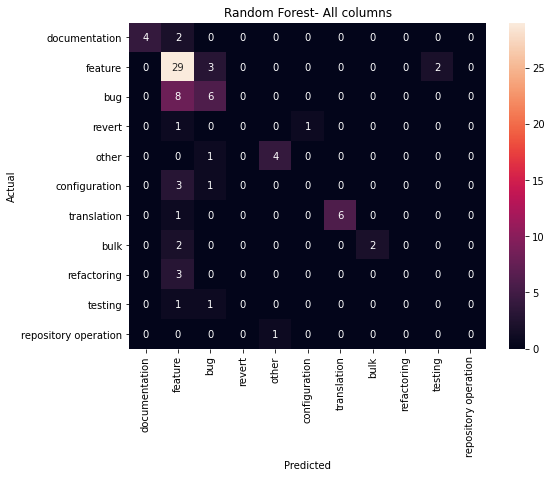

In [12]:
from sklearn.metrics import confusion_matrix
model = RandomForestClassifier(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_all, labels_all, df.index, test_size=0.25, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.final_tag.values, yticklabels=category_id_df.final_tag.values)
plt.ylabel('Actual')
plt.title('Random Forest- All columns')
plt.xlabel('Predicted')
plt.show()

# All excluding first commit message

In [13]:
features_all_excluding_first_commit = tfidf.fit_transform(df.all_excluding_first_commit).toarray()
labels_all_excluding_first_commit = df.category_id
features_all_excluding_first_commit.shape

(326, 206)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df['all_excluding_first_commit'], df['final_tag'], random_state = 0)

models = [
    RandomForestClassifier(random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df_2 = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_all_excluding_first_commit, labels_all_excluding_first_commit, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df_2 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# Accuracy of all algorithms
cv_df_2.groupby('model_name').accuracy.mean()

C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


model_name
LinearSVC                 0.619627
LogisticRegression        0.595291
MultinomialNB             0.543124
RandomForestClassifier    0.644336
Name: accuracy, dtype: float64

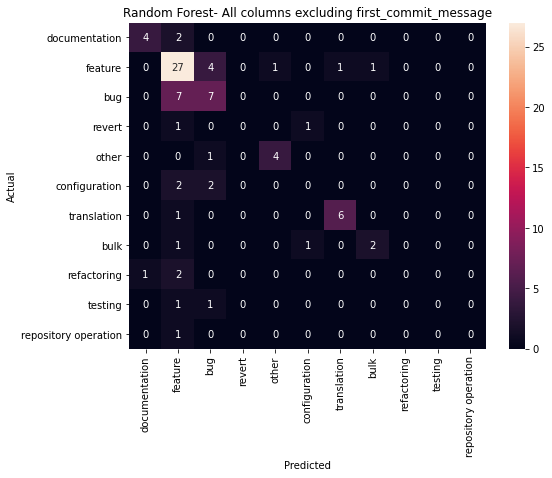

In [15]:
model = RandomForestClassifier(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_all_excluding_first_commit, labels_all_excluding_first_commit, df.index, test_size=0.25, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.final_tag.values, yticklabels=category_id_df.final_tag.values)
plt.ylabel('Actual')
plt.title('Random Forest- All columns excluding first_commit_message')
plt.xlabel('Predicted')
plt.show()

In [16]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['final_tag'].unique()))

                      precision    recall  f1-score   support

       documentation       0.80      0.67      0.73         6
             feature       0.60      0.79      0.68        34
                 bug       0.47      0.50      0.48        14
              revert       0.00      0.00      0.00         2
               other       0.80      0.80      0.80         5
       configuration       0.00      0.00      0.00         4
         translation       0.86      0.86      0.86         7
                bulk       0.67      0.50      0.57         4
         refactoring       0.00      0.00      0.00         3
             testing       0.00      0.00      0.00         2
repository operation       0.00      0.00      0.00         1

            accuracy                           0.61        82
           macro avg       0.38      0.37      0.37        82
        weighted avg       0.54      0.61      0.57        82



C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# All excluding title

In [17]:
features_all_excluding_title = tfidf.fit_transform(df.all_excluding_title).toarray()
labels_all_excluding_title = df.category_id
features_all_excluding_title.shape

(326, 212)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['all_excluding_title'], df['final_tag'], random_state = 0)

models = [
    RandomForestClassifier(random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df_2 = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_all_excluding_title, labels_all_excluding_title, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df_2 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# Accuracy of all algorithms
cv_df_2.groupby('model_name').accuracy.mean()

C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


model_name
LinearSVC                 0.558368
LogisticRegression        0.512354
MultinomialNB             0.481538
RandomForestClassifier    0.573800
Name: accuracy, dtype: float64

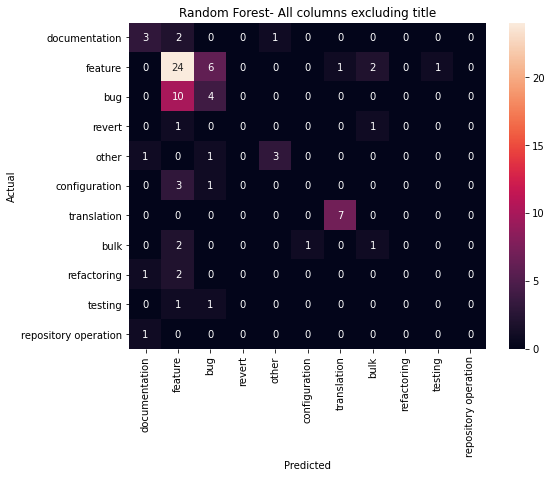

In [19]:
model = RandomForestClassifier(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_all_excluding_title, labels_all_excluding_title, df.index, test_size=0.25, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.final_tag.values, yticklabels=category_id_df.final_tag.values)
plt.ylabel('Actual')
plt.title('Random Forest- All columns excluding title')
plt.xlabel('Predicted')
plt.show()

# All excluding first comment

In [20]:
features_all_excluding_first_comment = tfidf.fit_transform(df.all_excluding_first_comment).toarray()
labels_all_excluding_first_comment = df.category_id
features_all_excluding_first_comment.shape

(326, 118)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df['all_excluding_first_comment'], df['final_tag'], random_state = 0)

models = [
    RandomForestClassifier(random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df_2 = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_all_excluding_first_comment, labels_all_excluding_first_comment, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df_2 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# Accuracy of all algorithms
cv_df_2.groupby('model_name').accuracy.mean()

C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


model_name
LinearSVC                 0.595012
LogisticRegression        0.604382
MultinomialNB             0.570583
RandomForestClassifier    0.628765
Name: accuracy, dtype: float64

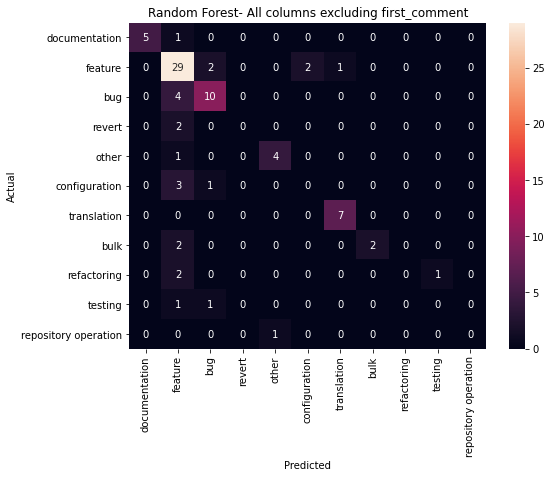

In [22]:
model = model = RandomForestClassifier(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_all_excluding_first_comment, labels_all_excluding_first_comment, df.index, test_size=0.25, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.final_tag.values, yticklabels=category_id_df.final_tag.values)
plt.ylabel('Actual')
plt.title('Random Forest- All columns excluding first_comment')
plt.xlabel('Predicted')
plt.show()

# All excluding labels

In [23]:
features_all_excluding_labels = tfidf.fit_transform(df.all_excluding_labels).toarray()
labels_all_excluding_labels = df.category_id
features_all_excluding_labels.shape

(326, 227)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df['all_excluding_labels'], df['final_tag'], random_state = 0)

models = [
    RandomForestClassifier(random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df_2 = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_all_excluding_labels, labels_all_excluding_labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df_2 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
# sns.boxplot(x='model_name', y='accuracy', data=cv_df)
# sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
#               size=8, jitter=True, edgecolor="gray", linewidth=2)
# plt.show()

# Accuracy of all algorithms
cv_df_2.groupby('model_name').accuracy.mean()

C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


model_name
LinearSVC                 0.616457
LogisticRegression        0.576737
MultinomialNB             0.555245
RandomForestClassifier    0.613520
Name: accuracy, dtype: float64

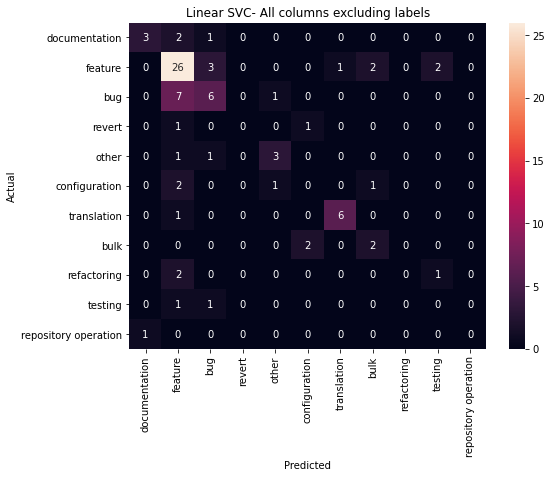

In [25]:
model = model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_all_excluding_labels, labels_all_excluding_labels, df.index, test_size=0.25, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.final_tag.values, yticklabels=category_id_df.final_tag.values)
plt.ylabel('Actual')
plt.title('Linear SVC- All columns excluding labels')
plt.xlabel('Predicted')
plt.show()

# All excluding file extensions

In [26]:
features_all_without_file_extensions = tfidf.fit_transform(df.all_without_file_extensions).toarray()
labels_all_without_file_extensions = df.category_id
features_all_without_file_extensions.shape

(326, 212)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df['all_without_file_extensions'], df['final_tag'], random_state = 0)

models = [
    RandomForestClassifier(random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df_2 = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_all_without_file_extensions, labels_all_without_file_extensions, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df_2 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# Accuracy of all algorithms
cv_df_2.groupby('model_name').accuracy.mean()

C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


model_name
LinearSVC                 0.592075
LogisticRegression        0.567646
MultinomialNB             0.542937
RandomForestClassifier    0.585921
Name: accuracy, dtype: float64

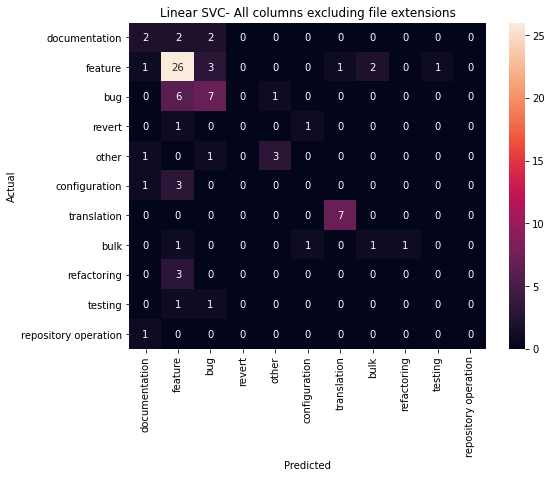

In [28]:
model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_all_without_file_extensions, labels_all_without_file_extensions, df.index, test_size=0.25, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.final_tag.values, yticklabels=category_id_df.final_tag.values)
plt.ylabel('Actual')
plt.title('Linear SVC- All columns excluding file extensions')
plt.xlabel('Predicted')
plt.show()

# All string data

In [29]:
features_all_string_data = tfidf.fit_transform(df.all_string_data).toarray()
labels_all_string_data = df.category_id
features_all_string_data.shape

(326, 216)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df['all_string_data'], df['final_tag'], random_state = 0)

models = [
    RandomForestClassifier(random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df_2 = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_all_string_data, labels_all_string_data, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df_2 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# Accuracy of all algorithms
cv_df_2.groupby('model_name').accuracy.mean()

C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


model_name
LinearSVC                 0.595012
LogisticRegression        0.579953
MultinomialNB             0.542984
RandomForestClassifier    0.632028
Name: accuracy, dtype: float64

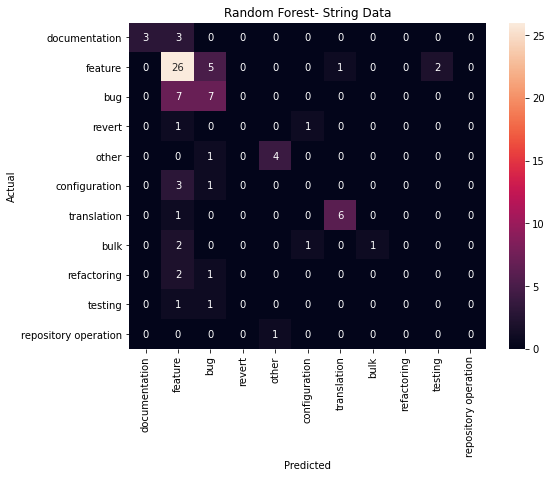

In [31]:
model = RandomForestClassifier(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_all_string_data, labels_all_string_data, df.index, test_size=0.25, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.final_tag.values, yticklabels=category_id_df.final_tag.values)
plt.ylabel('Actual')
plt.title('Random Forest- String Data')
plt.xlabel('Predicted')
plt.show()

# Title, commit message, comment

In [32]:
features_title_commit_comment = tfidf.fit_transform(df.title_commit_comment).toarray()
labels_title_commit_comment = df.category_id
features_title_commit_comment.shape

(326, 188)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df['title_commit_comment'], df['final_tag'], random_state = 0)

models = [
    RandomForestClassifier(random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df_2 = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_title_commit_comment, labels_title_commit_comment, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df_2 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# Accuracy of all algorithms
cv_df_2.groupby('model_name').accuracy.mean()

C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


model_name
LinearSVC                 0.564429
LogisticRegression        0.576830
MultinomialNB             0.552168
RandomForestClassifier    0.586014
Name: accuracy, dtype: float64

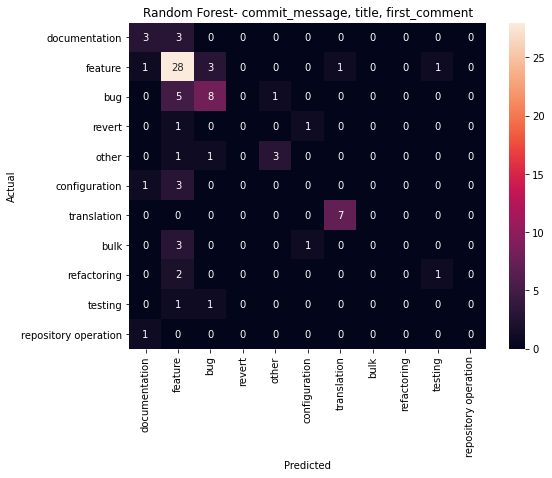

In [34]:
model = RandomForestClassifier(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_title_commit_comment, labels_title_commit_comment, df.index, test_size=0.25, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.final_tag.values, yticklabels=category_id_df.final_tag.values)
plt.ylabel('Actual')
plt.title('Random Forest- commit_message, title, first_comment')
plt.xlabel('Predicted')
plt.show()

# First 245 rows using all (75%)

In [35]:
df=pd.read_csv("Classification dataset.csv", encoding= 'unicode_escape', nrows=246)
df.tail()

,first_commit_message,title,first_comment,files_changed,file_extension,labels,lines_added,lines_removed,everything,all_excluding_first_commit,all_excluding_title,all_excluding_first_comment,all_excluding_labels,all_without_file_extensions,all_string_data,title_commit_comment,final_tag
241,Fix detection of main executable on android,Fix detection of main executable on android,NaN,1,cpp,CLASigned,2,7,Fix detection of main executable on android Fi...,Fix detection of main executable on android 1...,Fix detection of main executable on android 1...,Fix detection of main executable on android Fi...,Fix detection of main executable on android Fi...,Fix detection of main executable on android Fi...,Fix detection of main executable on android Fi...,Fix detection of main executable on android Fi...,bug
242,Adding a print to indicate which PTX version w...,Changes to allow correct occupancy with newer ...,I added a new environment variable: PTXAS_CUDA...,13,cc config diff h yml,NaN,381,107,Adding a print to indicate which PTX version w...,Changes to allow correct occupancy with newer ...,Adding a print to indicate which PTX version w...,Adding a print to indicate which PTX version w...,Adding a print to indicate which PTX version w...,Adding a print to indicate which PTX version w...,Adding a print to indicate which PTX version w...,Adding a print to indicate which PTX version w...,feature
243,Booksim2 abandoned svn and moved to github,Booksim2 abandoned svn and moved to github (ht...,Response to issue #5 Booksim2 abandoned svn an...,127,db svn-base,NaN,1,26051,Booksim2 abandoned svn and moved to github Boo...,Booksim2 abandoned svn and moved to github (ht...,Booksim2 abandoned svn and moved to github Res...,Booksim2 abandoned svn and moved to github Boo...,Booksim2 abandoned svn and moved to github Boo...,Booksim2 abandoned svn and moved to github Boo...,Booksim2 abandoned svn and moved to github Boo...,Booksim2 abandoned svn and moved to github Boo...,repository operation
244,Merge pull request #1 from cloudozer/master,Merge pull request #1 from cloudozer/master,update,0,NaN,NaN,0,0,Merge pull request #1 from cloudozer/master M...,Merge pull request #1 from cloudozer/master up...,Merge pull request #1 from cloudozer/master u...,Merge pull request #1 from cloudozer/master M...,Merge pull request #1 from cloudozer/master M...,Merge pull request #1 from cloudozer/master M...,Merge pull request #1 from cloudozer/master M...,Merge pull request #1 from cloudozer/master M...,repository operation
245,Merge pull request #1 from iluwatar/master,update from origin,NaN,0,NaN,status:underreview resolution:wontfix,0,0,Merge pull request #1 from iluwatar/master up...,update from origin 0 status:underreview reso...,Merge pull request #1 from iluwatar/master 0...,Merge pull request #1 from iluwatar/master up...,Merge pull request #1 from iluwatar/master up...,Merge pull request #1 from iluwatar/master up...,Merge pull request #1 from iluwatar/master up...,Merge pull request #1 from iluwatar/master up...,repository operation


In [36]:
df.fillna('', inplace=True)

In [37]:
df['category_id'] = df['final_tag'].factorize()[0]
category_id_df = df[['final_tag', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'final_tag']].values)

In [38]:
features_first_75_percent_all = tfidf.fit_transform(df.everything).toarray()
labels_first_75_all = df.category_id
features_first_75_percent_all.shape

(246, 140)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df['everything'], df['final_tag'], random_state = 0)

models = [
    RandomForestClassifier(random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df_2 = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_first_75_percent_all, labels_first_75_all, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df_2 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# Accuracy of all algorithms
cv_df_2.groupby('model_name').accuracy.mean()

C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


model_name
LinearSVC                 0.544980
LogisticRegression        0.540980
MultinomialNB             0.508653
RandomForestClassifier    0.585633
Name: accuracy, dtype: float64

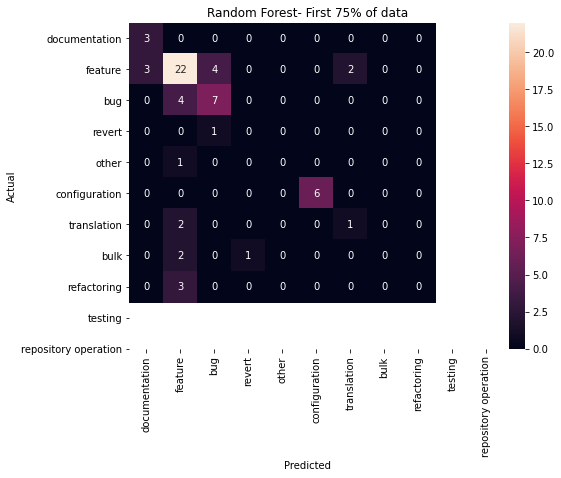

In [40]:
model = RandomForestClassifier(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_first_75_percent_all, labels_first_75_all, df.index, test_size=0.25, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.final_tag.values, yticklabels=category_id_df.final_tag.values)
plt.ylabel('Actual')
plt.title('Random Forest- First 75% of data')
plt.xlabel('Predicted')
plt.show()

 # First 163 rows using all (50%)

In [41]:
df=pd.read_csv("Classification dataset.csv", encoding= 'unicode_escape', nrows=164)
df.tail()

,first_commit_message,title,first_comment,files_changed,file_extension,labels,lines_added,lines_removed,everything,all_excluding_first_commit,all_excluding_title,all_excluding_first_comment,all_excluding_labels,all_without_file_extensions,all_string_data,title_commit_comment,final_tag
159,+ debian/,Debian package metadata,As side-effect - modified Makefiles: common ta...,17,bsd d default install linux osx patch makefile,NaN,252,66,+ debian/ Debian package metadata As side-effe...,Debian package metadata As side-effect - modif...,+ debian/ As side-effect - modified Makefiles:...,+ debian/ Debian package metadata 17 bsd d def...,+ debian/ Debian package metadata As side-effe...,+ debian/ Debian package metadata As side-effe...,+ debian/ Debian package metadata As side-effe...,+ debian/ Debian package metadata As side-effe...,feature
160,initial plugin,Openmanage,A plugin for checking the health of individual...,2,py md,NaN,170,0,initial plugin Openmanage A plugin for checkin...,Openmanage A plugin for checking the health of...,initial plugin A plugin for checking the healt...,initial plugin Openmanage 2 py md 170 0,initial plugin Openmanage A plugin for checkin...,initial plugin Openmanage A plugin for checkin...,initial plugin Openmanage A plugin for checkin...,initial plugin Openmanage A plugin for checkin...,feature
161,Simplify Travis configs and scripts.,[WIP] Simplify Travis configs and scripts.,NaN,4,yml sh py,CLASigned,147,186,Simplify Travis configs and scripts. [WIP] Sim...,[WIP] Simplify Travis configs and scripts. 4 ...,Simplify Travis configs and scripts. 4 yml sh...,Simplify Travis configs and scripts. [WIP] Sim...,Simplify Travis configs and scripts. [WIP] Sim...,Simplify Travis configs and scripts. [WIP] Sim...,Simplify Travis configs and scripts. [WIP] Sim...,Simplify Travis configs and scripts. [WIP] Sim...,configuration
162,Only disable RegisterVariables tests on gcc,Only disable RegisterVariables tests on gcc,NaN,1,patch,CLASigned,3,3,Only disable RegisterVariables tests on gcc On...,Only disable RegisterVariables tests on gcc 1...,Only disable RegisterVariables tests on gcc 1...,Only disable RegisterVariables tests on gcc On...,Only disable RegisterVariables tests on gcc On...,Only disable RegisterVariables tests on gcc On...,Only disable RegisterVariables tests on gcc On...,Only disable RegisterVariables tests on gcc On...,testing
163,webirc support,WebIRC support,NaN,4,cpp h,NaN,32,12,webirc support WebIRC support 4 cpp h 32 12,WebIRC support 4 cpp h 32 12,webirc support 4 cpp h 32 12,webirc support WebIRC support 4 cpp h 32 12,webirc support WebIRC support 4 cpp h 32 12,webirc support WebIRC support 4 32 12,webirc support WebIRC support cpp h,webirc support WebIRC support,feature


In [42]:
df.fillna('', inplace=True)

In [43]:
df['category_id'] = df['final_tag'].factorize()[0]
category_id_df = df[['final_tag', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'final_tag']].values)

In [44]:
features_first_half_all = tfidf.fit_transform(df.everything).toarray()
labels_first_half_all = df.category_id
features_first_half_all.shape

(164, 89)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df['everything'], df['final_tag'], random_state = 0)

models = [
    RandomForestClassifier(random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df_2 = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_first_half_all, labels_first_half_all, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df_2 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# Accuracy of all algorithms
cv_df_2.groupby('model_name').accuracy.mean()

C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


model_name
LinearSVC                 0.549432
LogisticRegression        0.524621
MultinomialNB             0.524621
RandomForestClassifier    0.573674
Name: accuracy, dtype: float64

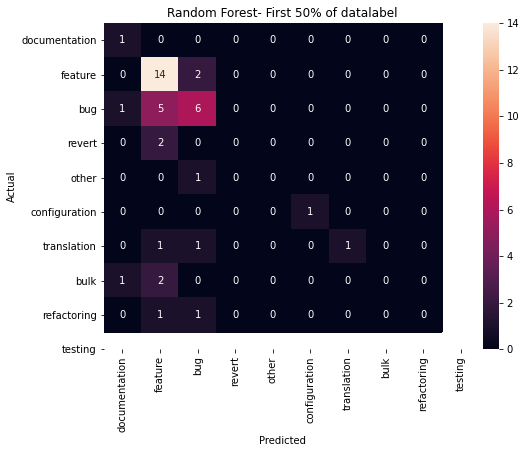

In [46]:
model = RandomForestClassifier(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_first_half_all, labels_first_half_all, df.index, test_size=0.25, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.final_tag.values, yticklabels=category_id_df.final_tag.values)
plt.ylabel('Actual')
plt.title('Random Forest- First 50% of datalabel')
plt.xlabel('Predicted')
plt.show()

 # First 82 rows using all (25%)

In [47]:
df=pd.read_csv("Classification dataset.csv", encoding= 'unicode_escape', nrows=83)
df.tail()

,first_commit_message,title,first_comment,files_changed,file_extension,labels,lines_added,lines_removed,everything,all_excluding_first_commit,all_excluding_title,all_excluding_first_comment,all_excluding_labels,all_without_file_extensions,all_string_data,title_commit_comment,final_tag
78,kanboard needs the php dom extension,kanboard needs the php dom extension,Add the missing php-xml package to the install...,1,markdown,NaN,2,2,kanboard needs the php dom extension kanboard ...,kanboard needs the php dom extension Add the m...,kanboard needs the php dom extension Add the m...,kanboard needs the php dom extension kanboard ...,kanboard needs the php dom extension kanboard ...,kanboard needs the php dom extension kanboard ...,kanboard needs the php dom extension kanboard ...,kanboard needs the php dom extension kanboard ...,documentation
79,Fix any remaning aliasing rules with propper m...,Fix any remaining aliasing rules with propper ...,NaN,11,cpp h,NaN,140,94,Fix any remaning aliasing rules with propper m...,Fix any remaining aliasing rules with propper ...,Fix any remaning aliasing rules with propper m...,Fix any remaning aliasing rules with propper m...,Fix any remaning aliasing rules with propper m...,Fix any remaning aliasing rules with propper m...,Fix any remaning aliasing rules with propper m...,Fix any remaning aliasing rules with propper m...,bug
80,Merge pull request #1 from iluwatar/master,"removed extra ""is"" from javadoc comments",NaN,1,java,NaN,1,1,Merge pull request #1 from iluwatar/master rem...,"removed extra ""is"" from javadoc comments 1 ja...",Merge pull request #1 from iluwatar/master 1 ...,Merge pull request #1 from iluwatar/master rem...,Merge pull request #1 from iluwatar/master rem...,Merge pull request #1 from iluwatar/master rem...,Merge pull request #1 from iluwatar/master rem...,Merge pull request #1 from iluwatar/master rem...,documentation
81,Better capitalization in the readme.,Better capitalization in readme.,Also reworded some sentences and wrapped one o...,1,md,NaN,44,33,Better capitalization in the readme. Better c...,Better capitalization in readme. Also reworded...,Better capitalization in the readme. Also rew...,Better capitalization in the readme. Better c...,Better capitalization in the readme. Better c...,Better capitalization in the readme. Better c...,Better capitalization in the readme. Better c...,Better capitalization in the readme. Better c...,documentation
82,Updated translation,Test,Before to submit your pull-request: Be sure th...,4,php markdown,NaN,54,51,Updated translation Test Before to submit your...,Test Before to submit your pull-request: Be su...,Updated translation Before to submit your pull...,Updated translation Test 4 php markdown 54 51,Updated translation Test Before to submit your...,Updated translation Test Before to submit your...,Updated translation Test Before to submit your...,Updated translation Test Before to submit your...,bulk


In [48]:
df.fillna('', inplace=True)

In [49]:
df['category_id'] = df['final_tag'].factorize()[0]
category_id_df = df[['final_tag', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'final_tag']].values)

In [50]:
features_first_25_percent_all = tfidf.fit_transform(df.everything).toarray()
labels_first_25_percent_all = df.category_id
features_first_25_percent_all.shape

(83, 25)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df['everything'], df['final_tag'], random_state = 0)

models = [
    RandomForestClassifier(random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df_2 = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_first_25_percent_all, labels_first_25_percent_all, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df_2 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# Accuracy of all algorithms
cv_df_2.groupby('model_name').accuracy.mean()

C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


model_name
LinearSVC                 0.470588
LogisticRegression        0.544118
MultinomialNB             0.543382
RandomForestClassifier    0.517647
Name: accuracy, dtype: float64

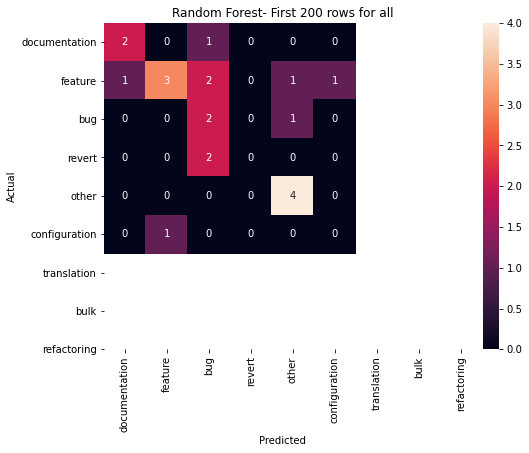

In [52]:
model = RandomForestClassifier(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_first_25_percent_all, labels_first_25_percent_all, df.index, test_size=0.25, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.final_tag.values, yticklabels=category_id_df.final_tag.values)
plt.ylabel('Actual')
plt.title('Random Forest- First 200 rows for all')
plt.xlabel('Predicted')
plt.show()